---

_You are currently looking at **version 1.2** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-machine-learning/resources/bANLa) course resource._

---

# Assignment 3 - Evaluation

In this assignment you will train several models and evaluate how effectively they predict instances of fraud using data based on [this dataset from Kaggle](https://www.kaggle.com/dalpozz/creditcardfraud).
 
Each row in `fraud_data.csv` corresponds to a credit card transaction. Features include confidential variables `V1` through `V28` as well as `Amount` which is the amount of the transaction. 
 
The target is stored in the `class` column, where a value of 1 corresponds to an instance of fraud and 0 corresponds to an instance of not fraud.

In [2]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

### Question 1
Import the data from `fraud_data.csv`. What percentage of the observations in the dataset are instances of fraud?

*This function should return a float between 0 and 1.* 

In [3]:
df = pd.read_csv(r"C:\Users\fdarvas\Desktop\py2_local\fraud_data.csv")

In [4]:
def answer_one():
    # Your code here

    return  len(df.Class[df.Class == 1]) / len(df)

answer_one()

0.016410823768035772

In [5]:
# Use X_train, X_test, y_train, y_test for all of the following questions
from sklearn.model_selection import train_test_split

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Question 2

Using `X_train`, `X_test`, `y_train`, and `y_test` (as defined above), train a dummy classifier that classifies everything as the majority class of the training data. What is the accuracy of this classifier? What is the recall?

*This function should a return a tuple with two floats, i.e. `(accuracy score, recall score)`.*

In [6]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import recall_score, accuracy_score

dummy = DummyClassifier(strategy="most_frequent").fit(X_train, y_train)
y_pred = dummy.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(recall_score(y_test, y_pred))


0.9852507374631269
0.0


In [7]:
def answer_two():

    # Your code here
    dummy = DummyClassifier(strategy="most_frequent").fit(X_train, y_train)
    y_pred = dummy.predict(X_test)  
    return (accuracy_score(y_test, y_pred),recall_score(y_test, y_pred))
answer_two()

(0.9852507374631269, 0.0)

### Question 3

Using X_train, X_test, y_train, y_test (as defined above), train a SVC classifer using the default parameters. What is the accuracy, recall, and precision of this classifier?

*This function should a return a tuple with three floats, i.e. `(accuracy score, recall score, precision score)`.*

In [8]:
from sklearn.metrics import precision_score
from sklearn.svm import SVC

In [9]:
def answer_three():

    # Your code here
    svc = SVC().fit(X_train, y_train)
    y_pred = svc.predict(X_test)
    return (accuracy_score(y_test, y_pred),recall_score(y_test, y_pred), precision_score(y_test, y_pred))

answer_three()

(0.9900442477876106, 0.35, 0.9333333333333333)

### Question 4

Using the SVC classifier with parameters `{'C': 1e9, 'gamma': 1e-07}`, what is the confusion matrix when using a threshold of -220 on the decision function. Use X_test and y_test.

*This function should return a confusion matrix, a 2x2 numpy array with 4 integers.*

In [10]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [11]:
params = {'C': 1e9, 
          'gamma': 1e-07}

svc = SVC(**params).fit(X_train, y_train)
y_pred = svc.predict(X_test)
print(f"Accuracy score: {accuracy_score(y_test, y_pred)}\n",f"Recall: {recall_score(y_test, y_pred)}")
confusion_matrix(y_test, y_pred)

Accuracy score: 0.9963126843657817
 Recall: 0.8


array([[5340,    4],
       [  16,   64]], dtype=int64)

Text(0.5, 1.0, 'Precision-Recall Curve')

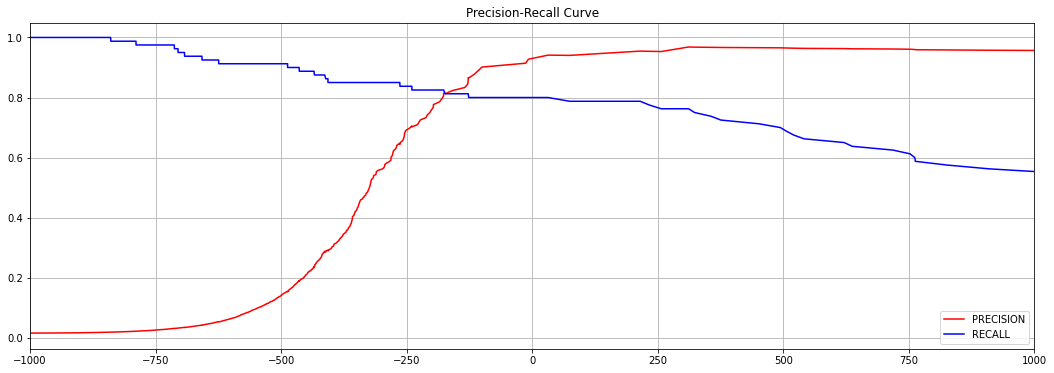

In [12]:
decision_function = svc.decision_function(X_test)
# Plot Precision-Recall curve using sklearn.
from sklearn.metrics import precision_recall_curve
precision, recall, threshold = precision_recall_curve(y_test, decision_function)

# Plot the output.
plt.figure(figsize=(18,6))
plt.plot(threshold, precision[:-1], c ='r', label ='PRECISION')
plt.plot(threshold, recall[:-1], c ='b', label ='RECALL')
plt.xlim(left=-1000)
plt.xlim(right=1000)
plt.grid()
plt.legend()
plt.title('Precision-Recall Curve')


In [14]:
# Aplicando el threshold

params = {'C': 1e9, 
          'gamma': 1e-07}

svc = SVC(**params).fit(X_train, y_train)
y_pred = (svc.decision_function(X_test)) > -200
print(f"Accuracy score: {accuracy_score(y_test, y_pred)}\n",f"Recall: {recall_score(y_test, y_pred)}")
confusion_matrix(y_test, y_pred)

Accuracy score: 0.9937315634218289
 Recall: 0.825


array([[5324,   20],
       [  14,   66]], dtype=int64)

In [15]:
def answer_four():
    # Your code here
    params = {'C': 1e9, 
          'gamma': 1e-07}

    svc = SVC(**params).fit(X_train, y_train)
    y_pred = (svc.decision_function(X_test)) > -200
    return confusion_matrix(y_test, y_pred)

answer_four()

array([[5324,   20],
       [  14,   66]], dtype=int64)

### Question 5

Train a logisitic regression classifier with default parameters using X_train and y_train.

For the logisitic regression classifier, create a precision recall curve and a roc curve using y_test and the probability estimates for X_test (probability it is fraud).

Looking at the precision recall curve, what is the recall when the precision is `0.75`?

Looking at the roc curve, what is the true positive rate when the false positive rate is `0.16`?

*This function should return a tuple with two floats, i.e. `(recall, true positive rate)`.*

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, roc_curve, auc

Accuracy score: 0.9937315634218289
 Recall: 0.825


Text(0, 0.5, 'Recall')

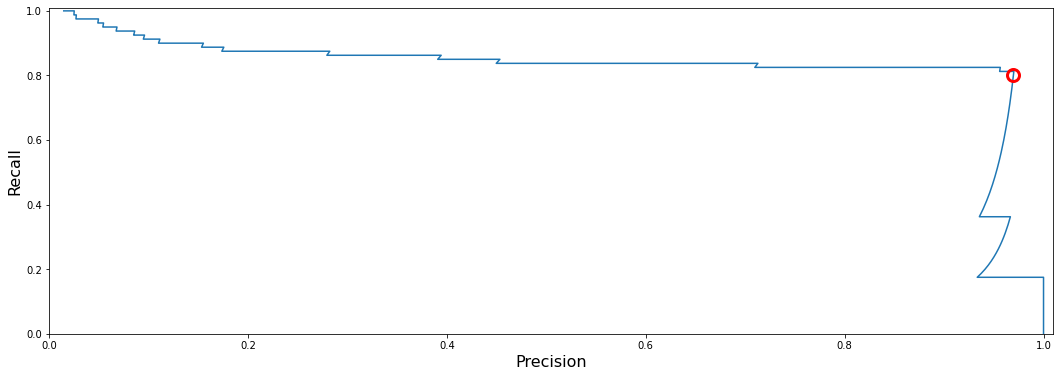

In [25]:
lr = LogisticRegression(solver='lbfgs', max_iter=1000)

y_score_lr = lr.fit(X_train, y_train).decision_function(X_test)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_score_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

#Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_score_lr)
closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

print(f"Accuracy score: {accuracy_score(y_test, y_pred)}\n",f"Recall: {recall_score(y_test, y_pred)}")
plt.figure(figsize=(18,6))
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.plot(precision, recall, label='Precision-Recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
# plt.axes().set_aspect('equal')

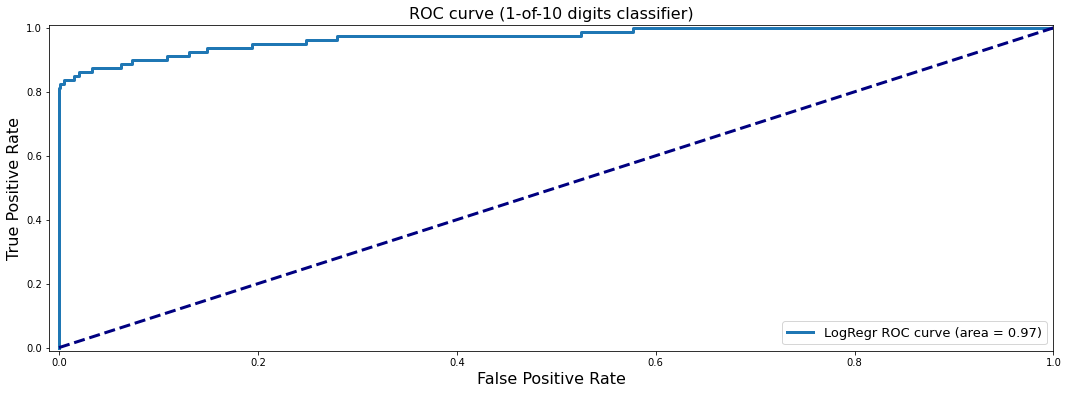

In [24]:
#ROC curve
plt.figure(figsize=(18,6))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lr, tpr_lr, lw=3, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc_lr))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve (1-of-10 digits classifier)', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
# plt.axes().set_aspect('equal')

In [68]:
def answer_five():
        
    # Your code here
    
    return (0.8, 0.18)

### Question 6

Perform a grid search over the parameters listed below for a Logisitic Regression classifier, using recall for scoring and the default 3-fold cross validation.

`'penalty': ['l1', 'l2']`

`'C':[0.01, 0.1, 1, 10, 100]`

From `.cv_results_`, create an array of the mean test scores of each parameter combination. i.e.

|      	| `l1` 	| `l2` 	|
|:----:	|----	|----	|
| **`0.01`** 	|    ?	|   ? 	|
| **`0.1`**  	|    ?	|   ? 	|
| **`1`**    	|    ?	|   ? 	|
| **`10`**   	|    ?	|   ? 	|
| **`100`**   	|    ?	|   ? 	|

<br>

*This function should return a 5 by 2 numpy array with 10 floats.* 

*Note: do not return a DataFrame, just the values denoted by '?' above in a numpy array. You might need to reshape your raw result to meet the format we are looking for.*

In [71]:
import seaborn as sns
from sklearn.model_selection import GridSearchCV

In [76]:
lr = LogisticRegression()
grid_values = {'penalty': ['l1', 'l2'],
               'C':[0.01, 0.1, 1, 10, 100]}

grid_clf_acc = GridSearchCV(lr, param_grid = grid_values,scoring="recall", n_jobs=-1, cv=3)
grid_clf_acc.fit(X_train, y_train)
y_decision_fn_scores_acc = grid_clf_acc.decision_function(X_test)
mean_test_score = grid_clf_acc.cv_results_['mean_test_score']


array([       nan, 0.79347826,        nan, 0.80072464,        nan,
       0.78985507,        nan, 0.80072464,        nan, 0.80072464])

In [77]:
def answer_six():    
    
    lr = LogisticRegression()
    grid_values = {'penalty': ['l1', 'l2'],
                'C':[0.01, 0.1, 1, 10, 100]}

    grid_clf_acc = GridSearchCV(lr, param_grid = grid_values,scoring="recall", n_jobs=-1, cv=3)
    grid_clf_acc.fit(X_train, y_train)
    y_decision_fn_scores_acc = grid_clf_acc.decision_function(X_test)
    mean_test_score = grid_clf_acc.cv_results_['mean_test_score']
    return mean_test_score

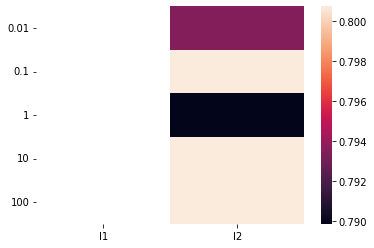

In [79]:
# Use the following function to help visualize results from the grid search
def GridSearch_Heatmap(scores):
    
    plt.figure()
    sns.heatmap(scores.reshape(5,2), xticklabels=['l1','l2'], yticklabels=[0.01, 0.1, 1, 10, 100])
    plt.yticks(rotation=0);

GridSearch_Heatmap(answer_six())